In [30]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


In [31]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

In [32]:
#observable = 'dphi'
observable = 'jetpt'
#observable = 'qt'
#observable = 'jeteta'

symbol = {}
symbol['dphi'] = '$\Delta\phi$ '
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$'

y = {} 
x = {} 
xerr = {}

altmc = 'Django'
mc = 'Rapgap'
names = {}
names['nominal'] = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,mc)
names['sys0']    = 'outputfiles/CrossSection_%s_%s_sys_0_ep0607_data_nominal.npy'%(observable,mc)
#names['sys1']   =  'outputfiles/CrossSection_%s_%s_sys_1._ep0607_data_nominal.npy'%(observable,mc)
#names['sys4']   =  'outputfiles/CrossSection_%s_%s_sys_6_ep0607_data_nominal.npy'%(observable,mc)
names['sys5']   =  'outputfiles/CrossSection_%s_%s_sys_5_ep0607_data_nominal.npy'%(observable,mc)
names['sys7']   =  'outputfiles/CrossSection_%s_%s_sys_7_ep0607_data_nominal.npy'%(observable,mc)
names['sys10']    = 'outputfiles/CrossSection_%s_%s_sys_10_ep0607_data_nominal.npy'%(observable,mc)
names['sys11']    = 'outputfiles/CrossSection_%s_%s_sys_11_ep0607_data_nominal.npy'%(observable,mc)
names['model']   = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,altmc)


label = {}
label['test'] = 'repeat'
label['sys0'] = 'HFS scale (in jet)'
label['sys2'] = 'HFS scale (remainder)'
label['sys4'] = 'HFS polar angle'
label['sys5'] = 'HFS azimuthal angle' 
label['sys7'] = 'Lepton energy scale'
label['sys10'] = 'Lepton polar angle'
label['sys11'] = 'Lepton azimuthal angle'
label['nonclosure'] = 'Non-closure'

label['model'] = 'Model'
#names['sys10']   =  'CrossSection_jetpt_Django_nominal_em0405_data_nominal.npy'

In [33]:

for key in names.keys():
    with open('%s'%names[key], 'rb') as f:
        print(key)
        y[key] = np.load(f)
        x[key] = np.load(f)

        xerr[key] = np.load(f)
        
        print('y = ',y[key])
        print('x = ', x[key])
        #print(xerr[key])

nominal
y =  [1.01879828e-01 4.74475119e-02 1.38732840e-02 2.90135903e-03
 5.64900100e-04 8.18488316e-05]
x =  [12.33899634 18.11116979 26.58356175 39.01933247 57.27254762 84.06460345]


FileNotFoundError: [Errno 2] No such file or directory: 'outputfiles/CrossSection_jetpt_Rapgap_sys_0_ep0607_data_nominal.npy'

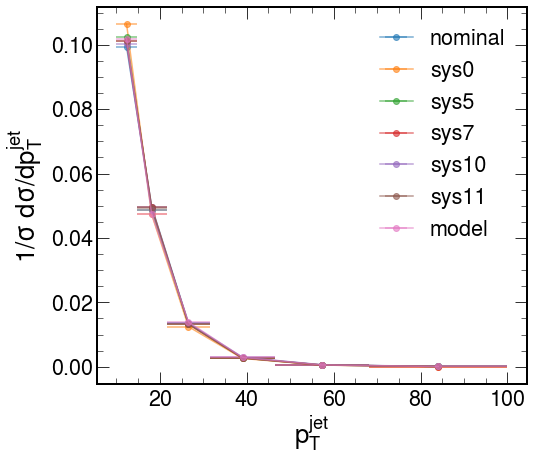

In [23]:
fig,ax = plt.subplots(figsize=(8,7))
for key in names.keys():
    plt.errorbar(x[key],y[key],xerr=xerr[key],fmt='o-',label=key,alpha=0.6)
    #plt.yscale('log')
    #plt.xscale('log')
    
    plt.legend()
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

plt.tight_layout()
fig.savefig('figures/Systematic uncertainties_variations_%s.png'%observable)


In [ ]:
##add 10% non closure systematics

In [24]:
nonclosure_sys = 1.10
##if 'dphi' in observable or 'eta' in observable:
##    nonclosure_sys = 1.05
    
y['nonclosure'] = y['nominal']*nonclosure_sys
print (y.keys())

dict_keys(['nominal', 'sys0', 'sys5', 'sys7', 'sys10', 'sys11', 'model', 'nonclosure'])


sys0
sys5
sys7
sys10
sys11
model
nonclosure


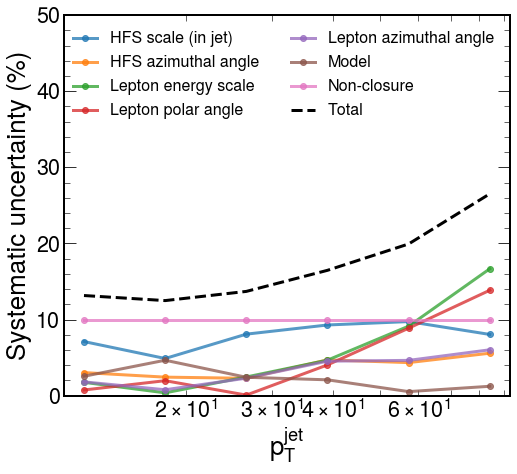

In [25]:
fig,ax = plt.subplots(figsize=(8,7))

total = np.zeros(len(y['nominal']))
ratio = {}

for key in y.keys():
    if 'nominal' in key:continue
    print (key)
    ratio[key] = np.divide(y[key],y['nominal']) -1
    total += ratio[key]*ratio[key]
    plt.plot(x['nominal'],100*abs(ratio[key]),'o-',label=label[key],lw=3,alpha=0.75)

total = np.sqrt(total)
N      = np.multiply( y['nominal'], xerr['nominal']*2.0)
#plt.plot(x['nominal'],100*np.sqrt(1/N), 'o--',label = 'stat error ',lw=3)
plt.plot(x['nominal'],100*total, '--',label = 'Total',lw=3,color='k')

plt.ylabel('Systematic uncertainty (%)')
plt.legend(loc='best',fontsize=16,ncol=2)
plt.xlabel(symbol[observable])

if 'qt' in observable or 'pt' in observable:
    plt.xscale('log')
plt.ylim([0,50])
plt.show()


fig.savefig('figures/Systematic uncertainties_%s.png'%observable)


In [ ]:
up = np.multiply(y['nominal'],(1+total))
do = np.multiply(y['nominal'],(1-total))

errory = np.subtract(up,do)
print (errory)
print (x['nominal'])
print (y['nominal'])

print (xerr['nominal'])

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

#plt.fill_between(x['nominal'], do, up,alpha=0.3,color='k',label='syst. error')
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k')
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

xposition = 0.2
if 'jetpt' in observable:
    xposition = 0.8
if 'qt' in observable:
    xposition = 0.8
if 'eta' in observable:
    xposition = 0.8
    
plt.text(xposition, 0.8,' H1 Preliminary \n $Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
plt.legend(loc='best',fontsize=18)

#plt.title('H1 Preliminary')
if 'dphi' in observable:
    plt.yscale('log')
if 'eta' in observable:
    print ('eta')

if 'jetpt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    
if 'qt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    

for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k',label='syst. error')

    
if 'eta' in observable:
    plt.ylim(bottom=0.0)
        
plt.show()
plt.tight_layout()

fig.savefig('figures/FinalResult_%s.png'%observable)

## Compare to Theory

In [ ]:
#la tabla está organizada como{ [valor central del bin], [ valor de la distribución], [incerteza del MC] } a NNLO, NLO y LO).
xs = {}
xs['NNLO'] =         1#914.45634 
xs['NLO']  =         1#941.73450 
xs['LO']   =         1#1052.71622 





## jet pT

In [ ]:
pt_x = np.array([12.11528 , 17.78279,26.10157, 38.31187,56.23413,82.54042])
pt_y = {}
pt_yerr = {},
pt_y['NNLO'] = np.array([0.110608780252012,0.0456758655730057,0.0116618565044425, 0.00266858037373604,0.000528808263749211,0.0000671679068329452
]) 

pt_y['NLO'] = np.array([0.114972236247544,0.0434595047765226,0.0111137562868369, 0.0025582605108055,
                        0.000530057158644401,0.0000669826006876228])


pt_y['LO'] = np.array([0.126311587752757,0.0392631056525735,0.009476532421875,0.00219986565946691,0.000475337005974265,0.000059703125])


In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

#plt.fill_between(x['nominal'], do, up,alpha=0.3,color='k',label='syst. error')
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')
plt.ylabel(r'$1/\sigma_{jet}$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k')
    
for i in pt_y.keys():

    plt.errorbar(x['nominal'], pt_y[i], xerr=xerr['nominal'],label=i,lw=2, alpha=0.7,fmt='-')
    #plt.fill_between(pt_x, pt_y[i]-pt_yerr[i],pt_y[i]+pt_yerr[i],alpha=0.4)
plt.yscale('log')
plt.xscale('log')

plt.legend()



fig,ax = plt.subplots(figsize=(9,7))

for i in pt_y.keys():

    plt.errorbar(x['nominal'], np.divide(pt_y[i],y['nominal']), xerr=xerr['nominal'],label=i,lw=2, alpha=0.7,fmt='-')
    plt.fill_between(x['nominal'],np.divide(do,y['nominal']), np.divide(up,y['nominal']),alpha=0.4,label='data uncertainty')

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))
#plt.fill_between(x['nominal'], do, up,alpha=0.3,color='k',label='syst. error')
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')
plt.ylabel(r'$1/\sigma_{jet}$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k')

pythia_x = np.array([ 1.2115e+01, 1.7783e+01, 2.6102e+01,3.8312e+01,5.6234e+01 ,8.2540e+01 ]) 
pythia_y = np.array([ 5.3522e-01, 2.8766e-01, 1.1464e-01,4.2848e-02,1.5311e-02, 4.0777e-03])

pythia_yhadoff = np.array([  5.3177e-01, 2.9426e-01,1.1341e-01,  4.1559e-02, 1.4699e-02,4.0076e-03])


print(pythia_x)
print(x['nominal'])
pythia_y = np.divide(pythia_y,xerr['nominal']*2.0)
pythia_yhadoff = np.divide(pythia_yhadoff,xerr['nominal']*2.0)

plt.errorbar(x['nominal'], pythia_y,xerr=xerr['nominal'],lw=3, alpha=0.8,fmt='.',label='Pythia 8.3 (had. ON)')
plt.errorbar(x['nominal'], pythia_yhadoff,xerr=xerr['nominal'],lw=3, alpha=0.8,fmt='.',label='Pythia 8.3 (had. OFF)')

plt.yscale('log')
plt.xscale('log')

plt.legend()

fig.savefig('figures/HadronizationCorrection_distribution_%s.png'%observable)

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

had_corr = np.divide(pythia_yhadoff,pythia_y)
plt.errorbar(x['nominal'],y=had_corr,xerr=xerr['nominal'],fmt='o')
plt.ylabel('HAD OFF / HAD ON')
plt.xlabel('$p_{T}^{jet}$ [GeV]')
plt.ylim([0.5,1.5])
plt.xscale('log')
plt.show()
fig.savefig('figures/HadronizationCorrection_ratio_%s.png'%observable)

## Eta

In [ ]:
eta_x = np.array([-0.65000,0.05000,0.75000,1.45000,2.15000])
eta_y = {}
eta_y['NNLO'] = np.array([0.381056962886138,   0.648753612714769, 0.283387576607635,    0.0866357787908942,  0.0311693141399885  ])

eta_y['NLO'] = np.array([   0.435720929125737, 0.662697941367878, 0.2476178480722,   0.064762021046169,      0.0174297291748527 ])


eta_y['LO'] = np.array([   0.638976927757353,  0.647736878515625,  0.127572861408548,   0.0150334895909926,  0.000342266452205882])


for i in eta_y.keys():
    print(i)
    plt.errorbar(eta_x, eta_y[i],label=i)

plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])


pythia_x = np.array([-6.5000e-01,  5.0000e-02 , 7.5000e-01,1.4500e+00, 2.1500e+00 ])
pythia_y= np.array([2.4945e-01,4.3062e-01, 2.1446e-01,    6.6437e-02, 2.2325e-02])
pythia_yhadoff=np.array([ 2.8212e-01, 4.2419e-01, 1.8598e-01, 6.0118e-02,  2.0112e-02])


pythia_y = np.divide(pythia_y,xerr['nominal']*2.0)
pythia_yhadoff = np.divide(pythia_yhadoff,xerr['nominal']*2.0)
plt.plot(pythia_x,pythia_y,label='Pythia 8.3 had on')
plt.plot(pythia_x,pythia_yhadoff,label='Pythia 8.3 had off')
plt.legend()


plt.show()


In [ ]:

fig,ax = plt.subplots(figsize=(9,7))

plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k')
plt.errorbar(x['nominal'], pythia_y,xerr=xerr['nominal'],lw=3, alpha=0.8,fmt='.',label='Pythia 8.3 (had. ON)')
plt.errorbar(x['nominal'], pythia_yhadoff,xerr=xerr['nominal'],lw=3, alpha=0.8,fmt='.',label='Pythia 8.3 (had. OFF)')

plt.legend()

fig.savefig('figures/HadronizationCorrection_distribution_%s.png'%observable)

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

had_corr = np.divide(pythia_yhadoff,pythia_y)
plt.errorbar(x['nominal'],y=had_corr,xerr=xerr['nominal'],fmt='o')
plt.ylabel('HAD OFF / HAD ON')
plt.xlabel('$\eta^{jet}$')
plt.ylim([0.5,1.5])
plt.show()
fig.savefig('figures/HadronizationCorrection_ratio_%s.png'%observable)

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k')
    
for i in eta_y.keys():
    plt.errorbar(x['nominal'], np.divide(eta_y[i],had_corr), xerr=xerr['nominal'],label=i +' x NP corr',lw=3, alpha=0.8,fmt='.')
    #plt.errorbar(x['nominal'], eta_y[i], xerr=xerr['nominal'],label=i,lw=3, alpha=0.8,fmt='.')

#plt.yscale('log')
#plt.xscale('log')

plt.legend()

## qT

In [ ]:
qt_x = np.array([1.1707E-02 ,4.4260E-02 ,1.0222E-01 ,2.0541E-01 ,0.38915,0.71630 ,1.29878 ,2.33589])
qt_y = {}
qt_y['NNLO'] = np.array([ -13.7645619187469,   10.6607929515419, 4.40753793441018, 1.75115026921194, 0.680162928536466, 0.228549161184533,
  0.0723233213901126, 0.00711814982868331  ])

qt_y['NLO'] = np.array([  -14.0599214145383,   13.9724950884086,   4.09626719056974,   1.48059921414538, 0.544507609823183,     0.172372147740668 ,
   0.0506518751964637,     0.00532571900785855 ])

for i in qt_y.keys():
    print(i)
    qt_y[i] = qt_y[i]/xs[i]
    plt.errorbar(qt_x, qt_y[i],label=i)
    #plt.fill_between(eta_x, eta_y[i]-eta_yerr[i],eta_y[i]+eta_yerr[i])

plt.legend()
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])
plt.yscale('log')
plt.xscale('log')

kang_x = np.array([1.00E-02,   4.00E-02,   7.00E-02 ,   1.00E-01, 1.30E-01 ,1.60E-01,  1.90E-01, 2.20E-01 ,  2.50E-01  ,  2.80E-01, 3.10E-01,
                      4.10E-01,   
    4.50E-01,
    4.90E-01, 
    5.30E-01, 
    5.70E-01,    
    6.10E-01,    
    6.50E-01,  
    6.90E-01,   
    7.30E-01,    
    7.70E-01,    
    8.10E-01
])
kang_y = np.array([3.61E+03,  7.66E+03,6.63E+03,5.50E+03, 4.71E+03, 3.93E+03,    3.30E+03,2.74E+03,2.29E+03,  
                   1.90E+03  ,  1.64E+03,
      1.04E+03,
  8.66E+02,
       7.31E+02,
        6.13E+02,
      5.24E+02,
       4.42E+02,
        3.89E+02,
        3.36E+02,
       2.92E+02,
      2.47E+02,
       2.16E+02 
])




kang_y = kang_y/914.46 
plt.plot(kang_x,kang_y)

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k')
plt.ylabel(r'$1/\sigma_{jet}$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])


for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k')
    
#for i in qt_y.keys():
#    plt.errorbar(x['nominal'], qt_y[i], xerr=xerr['nominal'],label='pQCD (%s)'%i,lw=3, alpha=0.8,fmt='.')
#plt.yscale('log')
plt.xscale('log')

plt.plot(kang_x,kang_y/2.0,label='TMD (NLO+NLL)',lw=3)

plt.text(0.3, 9,' H1 Preliminary', weight="bold")

plt.text(xposition, 0.72,' $Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV \n $k_{T}, R=1.0$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
#plt.xlim(right=10.0)
plt.legend(loc='lower left')

## dphi 

In [ ]:
dphi_x = np.array([ 1.65806,
       1.83260,    
       2.00713,   
       2.18166,   
       2.35619,   
       2.53073,   
       2.70526,  
    2.8798E+00,    
    3.0543E+00])   


dphi_y = {}
dphi_y['NNLO'] =          np.array([
           0.0453623502413886,
           0.0571619617487322,
           0.0749156665433253,
           0.103740081939539,
           0.152690367281805,
           0.242671396532381,
           0.436443885721852,
           1.00684516762997,
           3.40713084048534])

dphi_y['NLO'] =   np.array([                                                  
            0.0323023561886051,
           0.0415421167362475,
            0.0557003724828094,
            0.0785790878683694,
           0.117918542362475,
           0.19188470336444,
            0.353918543467583,
           0.847882439624263,
         3.86288064833006,
    ])




for i in dphi_y.keys():
    print(i)
    dphi_y[i] = dphi_y[i]/xs[i]
    plt.errorbar(dphi_x, dphi_y[i],label=i)
    #plt.fill_between(eta_x, eta_y[i]-eta_yerr[i],eta_y[i]+eta_yerr[i])

plt.legend()
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])
plt.yscale('log')
plt.xscale('log')
plt.show()


In [ ]:


feng_x = np.array(
[
2.,
 2.1,
 2.2,
2.3,
2.4,
 2.45, 
 2.5,  
 2.55,  
 2.6, 
 2.65, 
 2.7, 
 2.75, 
 2.8, 
 2.85, 
 2.9, 
 2.95, 
 3.,   
 3.02,
 3.04,
 3.06,  
 3.08, 
 3.1, 
 3.11,  
 3.12,
 3.13, 
 3.1416])

feng_y = np.array([
  0.00179917,  
  0.00331018,
  0.00539893, 
  0.00833971, 
  0.0126007,
  0.0154574, 
  0.0189805, 
   0.0233841, 
  0.028952,
  0.0360966, 
   0.0454342, 
  0.0579107,
  0.074916,
   0.0984489,
  0.132818,
  0.181728,
  0.259287, 
  0.300555,
  0.350406,
   0.411112,
  0.485287,
  0.572557, 
    0.618239,
 0.659469,
  0.694866,
 0.711227
    
    
    
])

feng_y_norm = feng_y/np.sum(feng_y)
print(np.sum(feng_y_norm))
plt.plot(feng_x,feng_y_norm)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')
plt.ylabel(r'$1/\sigma_{jet}$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k')
    
for i in dphi_y.keys():
    plt.errorbar(x['nominal'], dphi_y[i], xerr=xerr['nominal'],label=i,lw=3, alpha=0.8,fmt='.')
plt.yscale('log')
#plt.xscale('log')

plt.plot(feng_x,10*feng_y,label='Yuan et al.',lw=3)
plt.legend()


In [ ]:
plt.plot(pt_x, pt_y['NNLO'],label='NNLO')
plt.plot(pt_x, pt_y['NLO'],label='NLO')
plt.plot(pt_x, pt_y['LO'],label='LO')
plt.legend()
plt.xlabel('jet pT')
plt.ylabel('$1/\sigma$ $d\sigma/dp_{T}$')
plt.yscale('log')

In [ ]:
plt.plot(pt_x,pt_y)

#plt.fill_between(x['nominal'], do, up,alpha=0.3,color='k',label='syst. error')
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k')
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k',label='syst. error')
plt.yscale('log')

In [ ]:
rivet = np.array([    4.962687e-01,
  2.761194e-01   ,
  1.641791e-01    ,
   4.850746e-02    ,
  7.462687e-03    ,
 3.731343e-03   ])

rivet_inclusive = sum(rivet)

rivet = np.divide(rivet,sum(rivet))
rivet = np.divide(rivet,xerr['nominal']*2.0)
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')

plt.plot(x['nominal'],rivet)
plt.yscale('log')

## RIVET

In [ ]:
rivet_pt = np.array([  1.357160e+05,
7.970300e+04,
3.097000e+04,
1.150100e+04,
4.135000e+03,
1.039000e+03
 ])

rivet_inclusive = sum(rivet_pt)
print(rivet_inclusive)
rivet_pt = np.divide(rivet_pt,rivet_inclusive)


In [ ]:
rivet_pt_nohad= np.array([ 
1.361900e+04 ,
7.969000e+03 ,
3.058000e+03 ,
1.188000e+03 ,
4.260000e+02 ,
9.800000e+01 ])
rivet_inclusive_nohad = sum(rivet_pt_nohad)
print(rivet_inclusive_nohad)
rivet_pt_nohad = np.divide(rivet_pt_nohad,rivet_inclusive_nohad)


In [ ]:
rivet_pt = np.divide(rivet_pt,xerr['nominal']*2.0)


In [ ]:

plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')
plt.plot(x['nominal'],rivet_pt)
plt.yscale('log')
print(np.divide(y['nominal'],rivet_pt))

## qT

In [ ]:


rivet_qt = np.array([
1.248000e+03,
4.524000e+03,
6.936000e+03,
5.474000e+03,
3.680000e+03,
2.091000e+03,
1.013000e+03,
1.970000e+02



])


print(sum(rivet_qt))
rivet_qt = np.divide(rivet_qt,rivet_inclusive)
rivet_qt = np.divide(rivet_qt,xerr['nominal']*2.0)





In [ ]:
rivet_qt_nohad  = np.array([
    1.374000e+03,
4.683000e+03,
6.991000e+03,
5.748000e+03,
3.888000e+03,
2.307000e+03,
1.154000e+03,
2.160000e+02])

print(sum(rivet_qt_nohad))
rivet_qt_nohad = np.divide(rivet_qt_nohad,rivet_inclusive_nohad)
rivet_qt_nohad = np.divide(rivet_qt_nohad,xerr['nominal']*2.0)


In [ ]:
plt.errorbar(x['nominal'],rivet_qt, xerr=xerr['nominal'],label='Pythia 8.3')
plt.errorbar(x['nominal'],rivet_qt_nohad, xerr=xerr['nominal'],label='Pythia8.3 NO HAD')

plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')
plt.xscale('log')
plt.xlabel('$q_{T}/Q$')
plt.legend()

In [ ]:
rivet_eta = np.array([6.317000e+03,
1.101300e+04,
5.489000e+03,
1.803000e+03,
5.500000e+02
 ])



rivet_eta = np.divide(rivet_eta,rivet_inclusive)

rivet_eta = np.divide(rivet_eta,xerr['nominal']*2.0)

plt.plot(x['nominal'],rivet_eta)
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k',label='data')


In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k')
plt.ylabel(r'$1/\sigma_{jet}$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])


for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k')
    
for i in qt_y.keys():
    plt.errorbar(x['nominal'], qt_y[i], xerr=xerr['nominal'],label='pQCD (%s)'%i,lw=3, alpha=0.8,fmt='.')
#plt.yscale('log')
plt.xscale('log')

plt.plot(kang_x,kang_y/2.0,label='TMD (NLO+NLL)',lw=3)
plt.plot(x['nominal'],rivet_qt,label='Pythia 8.3')

plt.text(0.3, 9,' H1 Preliminary', weight="bold")

plt.text(xposition, 0.72,' $Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV \n $k_{T}, R=1.0$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
#plt.xlim(right=10.0)
plt.legend(loc='lower left')